# Linear Regression model for Close prediction

In [229]:
from sklearn import linear_model
import pandas as pd
import matplotlib as plt
from sklearn.metrics import r2_score

In [230]:
df = pd.read_csv("../X-Y data.csv")

In [231]:
df = df.fillna(0)

In [232]:
MLDF_train = df[:10000][[ 'reach_sum', 'virality_mean', 'influence_score_sum',
       'followers_mean', 'like_count', 'comment_count', 'share_count',
       'tweet_count', 'love_count', 'retweet_count', 'positive_sentiment',
       'negative_sentiment','score', 'open-apc', 'high-apc', 'low-apc',
       'close-apc', 'volume-apc','volume-aapl']]

In [233]:
MLDF_test = df[10001:][[ 'reach_sum', 'virality_mean', 'influence_score_sum',
       'followers_mean', 'like_count', 'comment_count', 'share_count',
       'tweet_count', 'love_count', 'retweet_count', 'positive_sentiment',
       'negative_sentiment', 'score','open-apc', 'high-apc', 'low-apc',
       'close-apc', 'volume-apc','volume-aapl']]

Splitting X and Y

In [234]:
X = MLDF_train[[ 'reach_sum', 'virality_mean', 'influence_score_sum',
       'followers_mean', 'like_count', 'comment_count', 'share_count',
       'tweet_count', 'love_count', 'retweet_count', 'positive_sentiment',
       'negative_sentiment', 'score', 'open-apc', 'high-apc', 'low-apc',
       'close-apc', 'volume-apc']]

In [235]:
Y = MLDF_train[['volume-aapl']]

In [236]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Testing

In [237]:
X_test=MLDF_test[[ 'reach_sum', 'virality_mean', 'influence_score_sum',
       'followers_mean', 'like_count', 'comment_count', 'share_count',
       'tweet_count', 'love_count', 'retweet_count', 'positive_sentiment',
       'negative_sentiment', 'score', 'open-apc', 'high-apc', 'low-apc',
       'close-apc', 'volume-apc']].fillna(0)

In [238]:
Y_test = MLDF_test['volume-aapl']

In [239]:
Y_predicted = regr.predict(X_test)

In [240]:
prediction = pd.DataFrame()

In [241]:
prediction['y_test'] = Y_test
prediction["y_pred"] = Y_predicted 

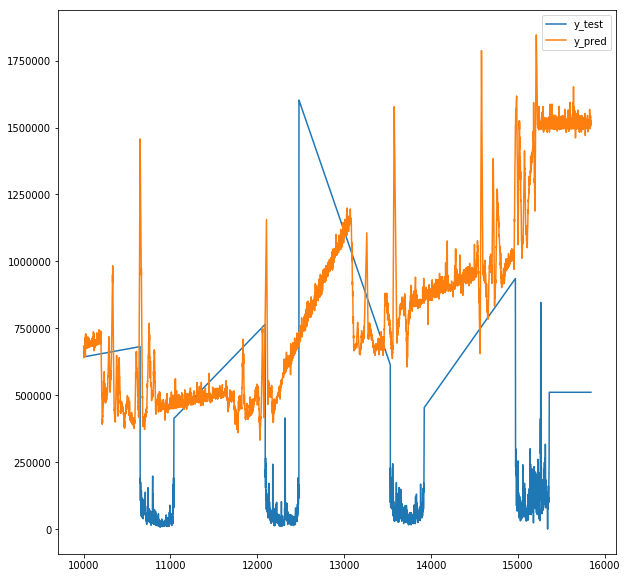

In [242]:
prediction.plot(figsize=(10,10))

In [243]:
error_value = r2_score(Y_test, Y_predicted)

In [244]:
error_value

-1.2337319950205639

# Bayesian Ridge Regression is used for regression

In [245]:
reg1 = linear_model.BayesianRidge()
reg1.fit(X, Y)

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

Testing

In [246]:
Y_predicted = reg1.predict(X_test)

In [247]:
prediction['y_test'] = Y_test
prediction["y_pred1"] = Y_predicted 

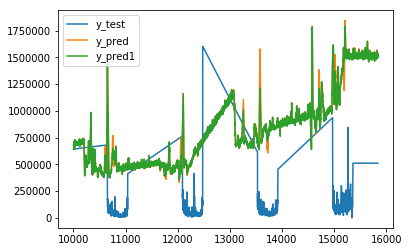

In [248]:
prediction.plot()

# Lasso regression

In [249]:
reg2 = linear_model.Lasso(alpha = 0.1)
reg2.fit(X, Y)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

testing

In [250]:
Y_predicted = reg2.predict(X_test)

In [251]:
prediction['y_test'] = Y_test
prediction["y_pred2"] = Y_predicted 

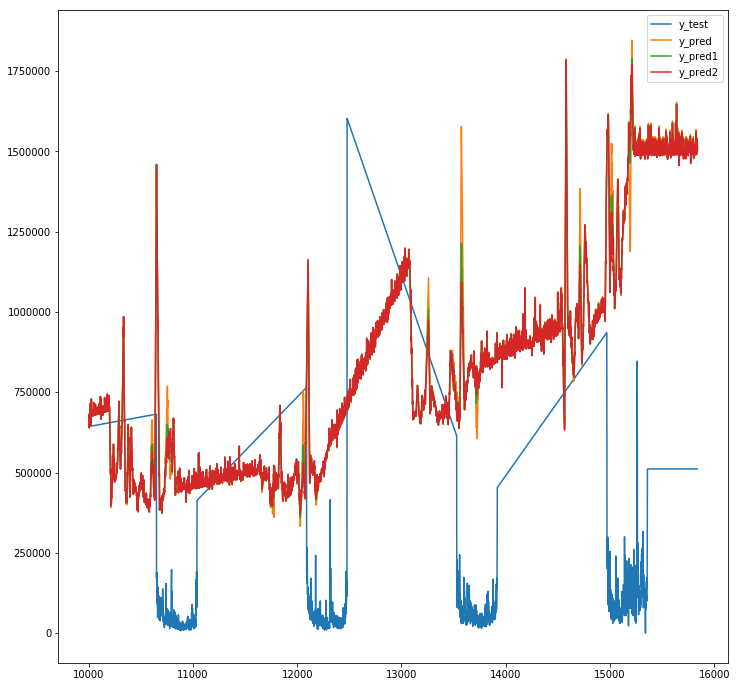

In [252]:
prediction.plot(figsize=(12,12))